# Regresión Lineal

En este notebook comenzamos a trabajar en los problemas de **Regresión**. Un problema de regresión consiste en aprender a predecir una *etiqueta* *Y* continua o cuantitativa a partir de un conjunto de atributos  **X**, tomando como muestra un conjunto de instancias. El modelo más común de regresión es la regresión lineal. Los modelos lineales se encuentran entre los modelos más simples, pero siguen siendo extremadamente comunes y útiles. Tienen algunas propiedades analíticas simples y son extremadamente fáciles de entrenar e interpretar. Además, son la base para un montón de modelos más complejos y modernos. Su importancia no debe ser subestimada.

## 1. Regresión Lineal - 1D

En la materia Introducción a la Ciencia de Datos ya han tenido un primer acercamiento a la regresión lineal. Aquí vamos a hacer un repaso de los principales conceptos que utilizaremos. Supongamos que queremos predecir una variable cuantitativa $Y$ como función de una única variable (por ahora, asumimos también cuantitativa) $X$. El modelo lineal asume que entre esas variables existe una relación del tipo

$$Y \approx \omega_0 + \omega_1 X,$$

donde $\beta_0$ y $\beta_1$ son los parámetros del modelo, en este caso conocidos como *ordenada al origen* y *pendiente*, respectivamente. Estos parámetros son, hasta que no utilicemos los datos, parámetros desconocidos del modelo, que debemos *ajustar*. Otra forma que a veces pueden encontrar para el modelo lineal es la siguiente:

$$Y = \omega_0 + \omega_1 X + \epsilon, $$

donde $\epsilon$ es un término de error del modelo. A primera vista, este término puede ser muy confuso, pero esperamos que pronto quede claro qué significa. Notar que, en cualquiera de las dos formas, la variable predictora $X$ aparece de forma *lineal*, es decir, es decir, no está elevada al cuadrado, dentro de una raíz cuadrada, dentro de un seno, etc. Veremos en clases posteriores que este modelo es mucho más flexible de lo que parece. Tal vez les sorprenda leer ahora que podemos utilizar el modelo lineal para obtener relaciones no-lineales.

**Referencias útiles**:

* Capítulo 3 de *An Introduction to Statistical Learning*. Lo pueden obtener [aquí](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf).
* [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/limo.html)


**Repaso**

1. ¿Cuáles son las ventajas de utilizar un modelo lineal?¿Y las desventajas?
1. ¿Cuáles son las hipótesis del modelo lineal? Si no se cumplen, ¿significa que no podemos usar una regresión?

#### Dataset Sintético

Vamos a comenzar generando un dataset sintético. Esto quiere decir que vamos a conocer la verdadera relación entre nuestra variable objetivo $Y$ y nuestra variable predictora $X$. Esto NO es lo común, pero lo hacemos para que puedan ver el efecto de algunas características del proceso.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda genera nuestro dataset sintético. Por ahora, serán 1000 puntos provenientes de una relación lineal 1-D de la forma $y = 3x - 2$. Asegúrate de identificar correctamente la pendiente ($\beta_1$) y la ordenada al origen ($\beta_0$).

In [166]:
#creamos un dataset sintético

n = 1000
X = np.linspace(-2,3,n)  # creo una serie de n datos entre -2 y 3
y_real = 3*X - 2

#print(X)
#print(y_real)

Sin embargo, esta relación no es muy realista, ya que en cualquier proceso de medición suele introducirse *ruido*. ¿Dónde se origina ese ruido? Bueno, podríamos escribir mucho al respecto, desde detalles técnicos hasta aspectos filosóficos. Por ahora vamos a decir que depende de cada proceso, a veces lo podemos reducir, a veces no. Vamos a experimentar introduciendo ruido gaussiano, de forma de acercanos a un proceso de medición realista.

In [167]:
np.random.seed(2022)
alpha = 1
y = y_real + alpha*np.random.randn(n) # que es alpha? alpha le esta agregando ruido a la función. 

Graficamos los puntos obtenidos junto con la curva teórica.

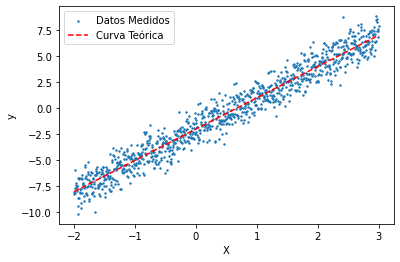

In [168]:
plt.scatter(X,y, s=2, alpha=1, label='Datos Medidos')
plt.plot(X, y_real, '--',label='Curva Teórica', c='r')
#plt.plot(X, y, '--',label='Curva Teórica', c='r')   # porqué esto me daria feo? 
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Notar que, si bien los puntos no están sobre la línea teórica - debido al ruido -, la relación lineal parece mantenerse muy bien.

**Ejercicio:** jugar con el código introduciento diferentes niveles de ruido modificando la variable `alpha`. ¿Cuándo crees, a simple vista, que la relación lineal ya queda oculta por el ruido?

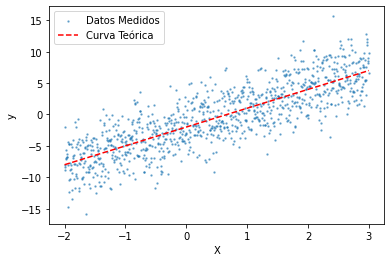

In [169]:
np.random.seed(2022)
alpha = 3
y = y_real + alpha*np.random.randn(n)

plt.scatter(X,y, s=2, alpha=0.5, label='Datos Medidos')
plt.plot(X, y_real, '--',label='Curva Teórica', c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Empecemos notando algo. Cualquier método para ajustar datos arranca con ciertos postulados sobre las características de esos datos. Para la regresión lineal son la linealidad, normalidad, homocedasticidad, independencia, ausencia de multicolinealidad, etc. Cuando estas condiciones se cumplen, el método es óptimo, y los resultados que se desprenden del método tienen total validez. Entonces, antes de ajustar una regresión lineal, deberíamos chequear si esas hipótesis se cumplen. Sin embargo, salvo en contadas ocasiones, es muy difícil tener absoluta certeza de que así sea. En general, no hay ningún motivo para suponer que esas condiciones se cumplan exactamente y, en muchos casos, ni siquiera aproximadamente. ¿Entonces significa que no podemos usar el método? Por suerte, no. Si no se cumplen, eso no significa que el método sea malo. Probablemente haya uno mejor - que en general no sabemos cuál es - y debemos tener particular cuidado con las conclusiones estadísticas que desprendamos del método. Además, exiten  métodos que se proponen con muy pocas hipótesis y que no tienen garantía de optimalidad teórica. Otros métodos son óptimos en condiciones muy generales, pero solo cuando el tamaño de muestra tiende a infinito (es decir, cuando es muy grande nuestro conjunto de datos). En el mundo real, no hay ningún método que sea mejor que todos los demás en todos los casos.

Pero hay algo más que también es importante diferenciar. Algunas veces, cuando estamos estudiando cierto fenómeno, nuestro objetivo principal no es modelar su naturaleza y entenderlo, sino simplemente tener poder predictivo sobre lo que va a ocurrir. Entonces, ¿qué podemos hacer en este mundo de hipótesis, métodos y objetivos aparentemente disímeles? Un enfoque complementario - típico de la comunidad de Aprendizaje Automática y expresado de manera simplificada - es probar un método y "si funciona, funciona". Pero, ¿cuándo un método funciona? Cuando tiene **poder predictivo**. Nuestro objetivo principal ya no va a ser modelar y comprender la realidad, sino simplemente tener buenas predicciones.

### 1.2 Regresión lineal con Scikit-Learn


Vamos a ajustar estos datos con la regresión lineal de Scikit-Learn. **Es recomendable consultar la [documentación sobre regresión lineal de esa librería](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).**

1. Definición de un objeto modelo `linear_model` (o como ustedes prefieran llamarlo, es indistinto).

In [170]:
from sklearn.linear_model import LinearRegression

# Crear una instancia de LinearRegression con los parámetros deseados
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)


2. Ajuste a los datos (`.fit(X,y)`).

**Nota:** cuando trabajen con un solo atributo (X tiene un solo atributo), se van a topar con un error típico. Scikit-Learn espera que X tenga la forma de *número de instancias* x *número de atributos*, entonces, debemos llevar X a esa forma bidimencional utilizando el método `reshape`.

In [171]:

print(X.shape)
X = X.reshape(-1,1)
print(X.shape)


(1000,)
(1000, 1)


Ya podemos ajustar

In [172]:
lineal_model = model.fit(X, y) 


Obtenga los pesos del modelo lineal.

*Pista:*
- *Considere los atributos `linear_model.coef_` y `linear_model.intercept_` del regresor lineal.

In [173]:
coeficientes = lineal_model.coef_[0]   # w1 --> pendiente
intercepto = lineal_model.intercept_   # w0 --> ordenada 

Wn = [
    intercepto, # w0 es la constante
    coeficientes, # w1 son los pesos que determinan el ángulo
]

print(coeficientes, intercepto)

3.0362009756304444 -1.9748437783628823


Notar que la pendiente es parte de un `array`... Eso es una pista de algo que se viene después. Ahora, ¿Cómo podemos hacer para saber si el ajuste es bueno?

En primer lugar, veamos otra cosa que podemos hacer con el objeto `linear_model`. Podemos hacer predicciones.

3. Predicciones (`.predict(X)`).

In [174]:
y_pred = lineal_model.predict(X) #estoy haciendo las predicciones del modelo

Nuevamente, veamos el resultado gráficamente.

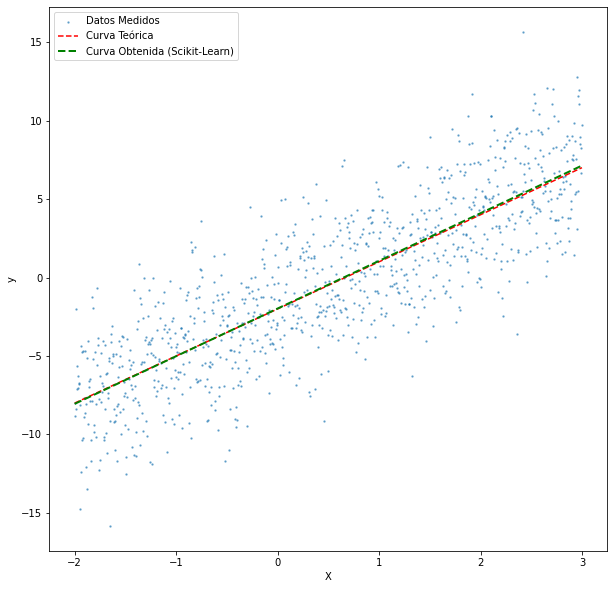

In [175]:
plt.figure(figsize=(10, 10)) 

plt.scatter(X,y, s=2, alpha=0.5, label='Datos Medidos')
plt.plot(X, y_real, '--',label='Curva Teórica', c='r')
plt.plot(X, y_pred, '--', lw=2, label='Curva Obtenida (Scikit-Learn)', c='g')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### 1.3 Evaluación

La evaluación de un modelo es algo tan importante como su entrenamiento. Lo primero que podemos hacer es comparar las predicciones obtenidas con los valores a predecir. Si el modelo está haciendo un buen trabajo, éstas deberían estar agrupadas alrededor de la identidad (la recta diagonal $y=x$).

#### Métricas

Otra forma de evaluar un modelo - sumamente importante y útil - es calcular una métrica de desempeño. En los problemas de regresión es común utilizar métricas como el **error cuadrático medio**:

$$ MSE(y, \hat y) = \frac{1}{M}\sum_{i=1}^M (y_i - \hat y_i)^2 $$

donde $M$ es la cantidad de instancias e $\hat y$ son las predicciones del modelo. Notar que estamos comparando cada dato y predicción de manera individual.

**Para Pensar:** si tuvieras que decir de qué parámetros del modelo depende el error cuadrático medio (MSE), ¿qué dirías?

Otra métrica muy utilizada, y un poco más amigable, es la **raiz del error cuadrático medio**, ya que tiene las mismas unidades que la variable obejtivo $y$

$$ RMSE(y, \hat y) = \sqrt{MSE(y, \hat y)} $$

Notar que la evaluación de un modelo siempre consiste en comparar los valores predichos $\hat y$ y los valores objetivo $y$, utilizando alguna métrica.

In [176]:
from sklearn.metrics import mean_squared_error         # importamos la función "Error Cuadratico Medio" (MSE)

def root_mean_squared_error(y, y_pred):                # creamos la función que obtiene la "Raiz MSE"
    return np.sqrt(mean_squared_error(y, y_pred))

print(f'MSE = {mean_squared_error(y,y_pred)}')         # printemos MSE
print(f'RMSE = {root_mean_squared_error(y,y_pred)}')   # printemos RMSE

MSE = 8.79595367134545
RMSE = 2.96579730786604


En este caso, por una cuestión de magnitudes, dan muy parecido. Modifica `alpha` (por ejemplo, 2, 5 y 10) y vuelve a correr. ¿Qué ocurre con el RMSE? También observa el gráfico y trata de ver si puedes interpretar el valor del RMSE gráficamente.

Existen muchas métricas para evaluar un modelo de regresión. Cuál será conveniente dependerá del objetivo de nuestro análisis. Pero notar que, en este caso, MSE es la misma métrica que utiliza Scikit-Learn para obtener los coeficientes del ajuste lineal. Es decir, estamos evaluando con la misma métrica que usamos para entrenar. Muchas veces esto **no será así.**

#### Residuos

Un último análisis que podemos hacer es el análisis de residuos. Esto consiste en ver la diferencia entre nuestra predicción y el valor real. El residuo se define como

$$ \text{res} = y - \hat y $$

Dos gráficos usuales que podemos hacer con los residuos son:

1. Su histograma

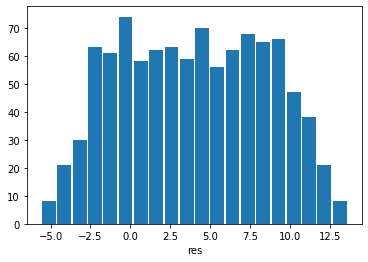

In [192]:
res = y - y_pred
plt.hist(res, bins = 20, rwidth = 0.9)
plt.xlabel('res')
plt.show()

En el enfoque clásico de regresión lineal, los residuos deben tener media cero y estar distribuidos normalmente. En la práctica, esto no suele suceder, ya que son necesarias muchas hipótesis para que así sea. Sin embargo, observar este gráfico puede darnos indicios de la calidad de nuestro modelo.

**Para pensar:** ¿Cuál te parece que es el *ancho* de esta distribución y con qué valor visto puede estar relacionado?

2. También podemos graficar la relación entre el residuos y el valor correspondiente de $X$

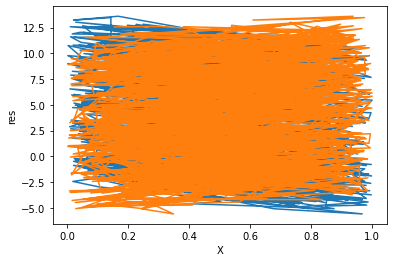

In [193]:
plt.plot(X, res)
plt.xlabel('X')
plt.ylabel('res')
plt.show()

Este gráfico también suele ser muy útil, ya que nos da una idea sobre en qué regiones de X el modelo anda mejor y en cuáles peor. A medida que hay más atributos predictores, este gráfico es más difícil de interpretar.


## 2. Regresión Lineal - 2D

La generalización de la regresión lineal a más atributos es muy sencilla. Por ejemplo, para dos atributos, $X_1$ y $X_2$, la forma es

$$Y \approx \omega_0 + \omega_1 X_1 + \omega_2 X_2.$$

Y, en el caso de $p$ variables predictoras,

$$Y \approx \omega_0 + \omega_1 X_1 + \omega_2 X_2 + \omega_3 X_3 + ... + \omega_p X_p.$$

Es decir, debemos encontrar una pendiente por cada atributo, pero sigue siendo una única ordenada al origen.

Ahora, replicaremos el mismo análisis, pero para una relación lineal con dos atributos, $y = -3x_1 + 2x_2 + 4$. Nuevamente, sumaremos algo de ruido para hacerlo más realista.

In [194]:
n = 1000
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = -3*x1 + 2*x2 + 4 + 0.25*np.random.randn(n)

Visualizamos. El código es un poco más complejo, no te preocupes si no lo entiendes.

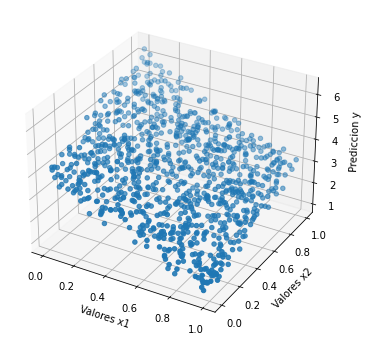

In [199]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):            # definimos una función para graficas 3D
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('Valores x1')         # leyenda ejes
    ax.set_ylabel('Valores x2')
    ax.set_zlabel('Prediccion y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

Creamos los atributos y hacemos un `train_test_split`

In [206]:
# creamos los atributos

X = np.vstack((x1,x2)).T #Uno a x1 y x2
print(X.shape)

print(X)

(1000, 2)
[[0.95271971 0.57033071]
 [0.21001494 0.00167505]
 [0.17558869 0.05197741]
 ...
 [0.89048246 0.99118404]
 [0.32690447 0.34031645]
 [0.79267237 0.66652738]]


In [245]:
# separamos con 80% train y 20% test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)


Notar que tiene el `shape` que necesita Scikit-Learn. Definimos los modelos y entrenamos

In [246]:
# definimos el modelo y lo entrenamos

model2 = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False) 
lineal_model2 = model2.fit(X_train, y_train) 




Nuevamente, veamos qué aprendió. Obtenga **las pendientes** y la ordenada al origen

In [234]:

coeficientes1 = lineal_model2.coef_[0]   # w1 --> pendiente
coeficientes2 = lineal_model2.coef_[1]  # w2 --> pendiente
intercepto = lineal_model2.intercept_   # w0 --> ordenada 

Wn = [
    intercepto, # w0 es la constante
    coeficientes1, # w1 son los pesos que determinan el ángulo
    coeficientes2, # w2
]



En este caso, la curva que aproxima a los datos no es más una curva, sino una superficie. La siguiente función nos ayuda a graficar. Nuevamente, no se preocupen si no entienden del todo lo que hace.

In [232]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N)
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)

    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)

    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

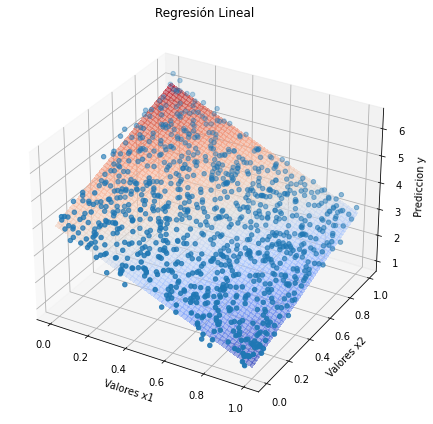

In [233]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, lineal_model2, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)
plt.tight_layout()
plt.show()

Nuevamente, podemos hacer una evaluación de los resultados. Empecemos haciendo las predicciones.

In [249]:
y_pred = lineal_model2.predict(X_train) #estoy haciendo las predicciones del modelo


Y repetimos la evaluación vista anteriormente.

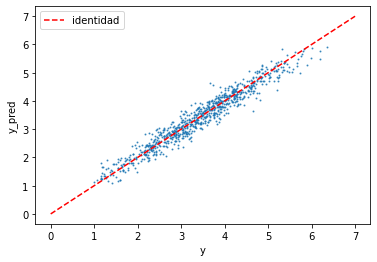

In [251]:


plt.scatter(y_train,y_pred, alpha=0.75, s=1)
plt.plot([0,7],[0,7], ls='--', c='r', label='identidad')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.legend()
plt.show()

Calcule MSE y RMSE

In [255]:
print(f'MSE = {mean_squared_error(y_train,y_pred)}')         # printemos MSE
print(f'RMSE = {root_mean_squared_error(y_train,y_pred)}')   # printemos RMSE

MSE = 0.06577356659232686
RMSE = 0.25646357751604193


Finalmente, miremos los residuos:

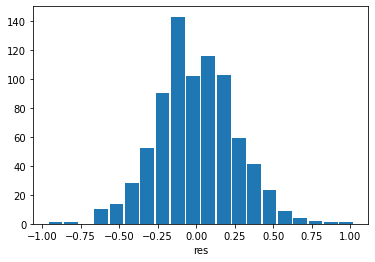

In [258]:
#### PREGUNTA: no entiendo que me esta queriendo decir el gráfico... 

res = y_train - y_pred
plt.hist(res, bins = 20, rwidth = 0.9)
plt.xlabel('res')
plt.show()

# Regresión Polinomial

Hasta ahora hemos utilizado modelos lineales para tareas de regresión y clasificación. Esto quiere decir que el resultado de nuestra predicción depende de una combinación lineal de los features. Sin embargo, hemos visto que es útil preprocesar los features antes de alimentar un modelo. Un preprocesado muy util, que permite capturar relaciones no lineales entre los features, es el _preprocesado polinómico_. El resultado de componer este preprocesado con un modelo lineal de regresión es lo que se conoce como _regresión polinómica_, pero también puede ser utilizado para clasificación con un regresor lineal.

A lo largo de este notebook:
- Nos encontraremos con un conjunto de datos que posee características no lineales
- Entrenaremos un regresor lineal para clasificar
- Realizaremos un preprocesamiento polinómico de los datos, y veremos esto modifica nuestros datos.
- Entrenaremos un regresor lineal polinómico, y lo compararemos al regresor lineal.
- Exploraremos distintos grados del polinomio, en búsqueda de encontrar _el grado óptimo_.


## Dataset

La siguiente línea de código generará un dataset sintético a utilizar en este notebook:

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [260]:
np.random.seed(42)
X = 6 * np.random.rand(500, 1) - 3
y = 0.5 * 2*X**2 + X + 2 + np.random.randn(500, 1)

## Ejercicio 1

- Examine el dataset y grafíquelo
- Utilice la función `train_test_split` para separar un 20% del dataset como conjunto de test. Este servirá para evaluar la performance del modelo sobre datos no vistos anteriormente.

In [278]:
#print(X_train)

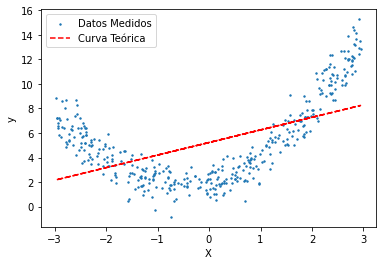

In [277]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False) 
lineal_model3 = model3.fit(X_train, y_train) 

coeficientes1 = lineal_model2.coef_[0]   # w1 --> pendiente
intercepto = lineal_model2.intercept_   # w0 --> ordenada 

Wn = [
    intercepto, # w0 es la constante
    coeficientes1, # w1 son los pesos que determinan el ángulo
]

y_pred = lineal_model3.predict(X_train) #estoy haciendo las predicciones del modelo

plt.scatter(X_train,y_train, s=2, alpha=1, label='Datos Medidos')
plt.plot(X_train, y_pred, '--',label='Curva Teórica', c='r')
#plt.plot(X, y, '--',label='Curva Teórica', c='r')   # porqué esto me daria feo? 
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

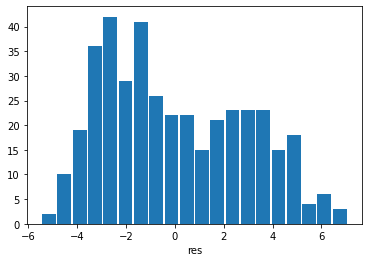

In [276]:
res = y_train - y_pred
plt.hist(res, bins = 20, rwidth = 0.9)
plt.xlabel('res')
plt.show()

## Ejercicio 2

- Entrene un regresor lineal a los datos de entrenamiento
- Genere las predicciones.
- Grafique el conjunto de datos con la línea de regresión.
- Calcule MSE y RMSE. Qué observa?

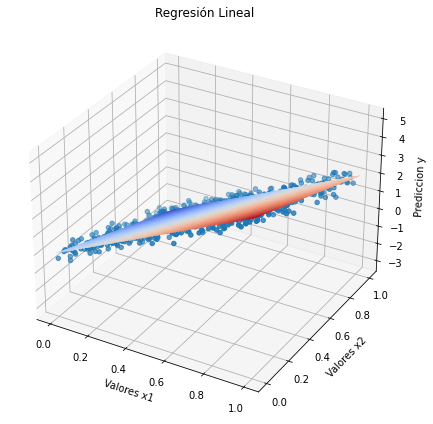

MSE = 0.06613532573650689
RMSE = 0.25716789406243323


In [296]:
#creamos un dataset

n = 1000
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = 5*x1 + -3*x2 + 0 + 0.25*np.random.randn(n)

# creamos los atributos y hacemos train_test_split
X = np.vstack((x1,x2)).T #Uno a x1 y x2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# definimos el modelo y lo entrenamos

model4 = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False) 
lineal_model4 = model4.fit(X_train, y_train) 


coeficientes1 = lineal_model4.coef_[0]   # w1 --> pendiente
coeficientes2 = lineal_model4.coef_[1]  # w2 --> pendiente
intercepto = lineal_model4.intercept_   # w0 --> ordenada 

Wn = [
    intercepto, # w0 es la constante
    coeficientes1, # w1 son los pesos que determinan el ángulo
    coeficientes2, # w2
]


y_pred2 = lineal_model4.predict(X_train) #estoy haciendo las predicciones del modelo


fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, lineal_model4, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)
plt.tight_layout()
plt.show()


print(f'MSE = {mean_squared_error(y_train,y_pred2)}')         # printemos MSE
print(f'RMSE = {root_mean_squared_error(y_train,y_pred2)}')   # printemos RMSE





## Ejercicio 3

Un polinomio de grado $M$ es una combinación lineal de monomios de grado $0$ hasta $M$. Es decir, si miramos un polinomio univariable de segundo grado, este es de la forma:
$$w_0 + w_1 x + w_2 x^2 $$
que no es mas que una combinacion lineal de los monomios $x^0$ ($=1$), $x^1$ ($=x$) y $x^2$.

El caso de dos variables $x_1$ y $x_2$ (como nuestro dataset), tambien hay que tener en cuenta los terminos cruzados:
$$w_{(0,0)} + w_{(1,0)} x_1 + w_{(0,1)} x_2 + w_{(2,0)} x_1^2 + w_{(1,1)} x_1 x_2 + w_{(0,2)} x_2^2$$

es decir una combinacion lineal de los monomios $1$, $x_1$, $x_2$, $x_1^2$, $x_2^2$ y $x_1 x_2$.

Esto implica que un modelo polinomico no es mas que un modelo lineal, con un preprocesado que consiste en tomar los features del dataset, y devolver todos los monomios de estos hasta cierto grado.

Este ya esta implementado en sklearn:



- Importe de `sklearn.preprocessing` el transformer `PolynomialFeatures`.
- Instancielo con el grado polinomico 1, 2 y 3. Para cada uno de ellos, transforme los datos (_Pista: `.fit_transform()`_), y examine como cambia el dataset, en particular mire el `shape`.

*Nota:*  Resulta crucial comprender que `PolynomialFeatures` es un _transformador_, no un _modelo de aprendizaje_ propiamente dicho. Aunque implemente métodos como `.fit()` y `.transform()`, su función principal es preparar o modificar los datos de entrada (features) para su posterior uso en modelos de aprendizaje. El método .fit() en el contexto de PolynomialFeatures no aprende o ajusta ningún parámetro del modelo a partir de los datos. En cambio, simplemente determina la estructura de los monomios (términos polinómicos) basándose en el grado especificado y las características de entrada. Por lo tanto, aunque utilizamos .fit() y .fit_transform(), su propósito es puramente de preprocesamiento: expandir el espacio de características para incluir términos polinómicos, lo que puede ayudar a modelos lineales simples a capturar relaciones no lineales dentro de los datos.

In [308]:
from sklearn.preprocessing import PolynomialFeatures

n = 1000
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = 5*x1 + -3*x2 + 0 + 0.25*np.random.randn(n)

# creamos los atributos y hacemos train_test_split
X = np.vstack((x1,x2)).T #Uno a x1 y x2

print(X)
print(X.shape)

#poly1 = PolynomialFeatures(1)
#poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)

#poly1.fit_transform(X)
#poly2.fit_transform(X)
poly3.fit_transform(X)







[[0.37915988 0.23960454]
 [0.69177668 0.04600694]
 [0.42539204 0.74482208]
 ...
 [0.0739458  0.23602779]
 [0.88939676 0.54271116]
 [0.42086116 0.70676139]]
(1000, 2)


array([[1.00000000e+00, 3.79159885e-01, 2.39604544e-01, ...,
        3.44460807e-02, 2.17676969e-02, 1.37557777e-02],
       [1.00000000e+00, 6.91776682e-01, 4.60069353e-02, ...,
        2.20168479e-02, 1.46424088e-03, 9.73800317e-05],
       [1.00000000e+00, 4.25392041e-01, 7.44822075e-01, ...,
        1.34781803e-01, 2.35990456e-01, 4.13197438e-01],
       ...,
       [1.00000000e+00, 7.39458028e-02, 2.36027787e-01, ...,
        1.29059563e-03, 4.11945531e-03, 1.31488994e-02],
       [1.00000000e+00, 8.89396756e-01, 5.42711163e-01, ...,
        4.29298961e-01, 2.61958835e-01, 1.59847653e-01],
       [1.00000000e+00, 4.20861157e-01, 7.06761387e-01, ...,
        1.25184484e-01, 2.10225055e-01, 3.53035553e-01]])

## Ejercicio 4

- Entrene un regresor lineal polinómico de grado 2 sobre el dataset de entrenamiento.
- Evalúe MSE y RMSE sobre los conjuntos de entrnamiento y evaluación. Compare con el obtenido en el ejercicio 2.
- Arme un pipeline de sklearn usando como primer paso el preprocesador polinomico, y como ultimo el regresor lineal. (_Pista: tanto `Pipeline` como `make_pipeline` de `sklearn.pipeline` pueden servir_)
- Entrene este pipeline sobre el conjunto de entrenamiento.
- Haga las predicciones.
- Grafique el conjunto de datos y la linea de regresión.
- Calcule MSE y RMSE. Qué observa?

In [ ]:
#Completar

## Ejercicio de Regresión Polinómica: Predicción de Precios de Viviendas

Eres un analista de datos en una empresa inmobiliaria y se te ha proporcionado el conjunto de datos housing.csv que contiene información sobre diferentes propiedades y sus características. Tu tarea principal es predecir el precio de las viviendas basándote en sus características, pero en particular, estás interesado en investigar cómo el tamaño de la vivienda (por ejemplo, area si existe esa columna en el conjunto de datos) afecta el precio de manera no lineal.

Instrucciones:

1. Carga y Análisis Exploratorio de Datos: Comienza cargando el conjunto de datos Housing.csv. Realiza un análisis exploratorio básico y visualiza la relación entre el tamaño de las viviendas y sus precios.

1. Regresión Lineal Simple: Como primer paso, modela la relación entre el tamaño de la vivienda y el precio utilizando regresión lineal simple. Evalúa el rendimiento de este modelo utilizando métricas adecuadas como el RMSE.

1. Regresión Polinómica: Al observar los resultados y las visualizaciones del modelo lineal, considera aplicar una regresión polinómica. Transforma la característica del tamaño de la vivienda para incluir términos polinómicos y ajusta una regresión lineal a estos términos transformados.

1. Comparación y Evaluación: Evalúa y compara el rendimiento del modelo polinómico con el modelo lineal simple. ¿Qué grado del polinomio proporciona el mejor ajuste para los datos sin sobreajustar?

1. Visualización: Grafica las viviendas en función de su tamaño y precio. Añade las curvas de regresión para el modelo lineal y el modelo polinómico y compara visualmente cómo se ajustan a los datos.

1. Reflexión Final: ¿En qué escenarios considerarías usar regresión polinómica sobre regresión lineal simple? ¿Hay alguna preocupación sobre el uso de polinomios de grado muy alto?


## Dataset de EALS

### Regresión Lineal Simple:

1. Predicción de speaking_rate basada en alsfrsr_1 (habla): Estudiar cómo la capacidad de hablar (medida a través de alsfrsr_1) está relacionada con la velocidad a la que los usuarios pueden hablar.

1. Predicción de intelligibility basada en bulbar (suma de las tres primeras preguntas relacionadas con el habla y el tracto vocal): Analizar la relación entre la claridad con la que los pacientes pueden hablar y su puntuación en la escala bulbar.

### Regresión Lineal Múltiple:

1. Predicción de alsfrsr (suma de las 12 preguntas) utilizando speaking_rate, intelligibility, y years_since_onset: Explorar cómo diferentes características relacionadas con el habla y el tiempo transcurrido desde el inicio de la enfermedad pueden predecir la puntuación general de la escala ALSFRS-R.

1. Influencia del site_of_onset_bulbar en la intelligibility ajustando por alsfrsr: Investigar si el sitio de inicio de los síntomas (bulbar o no) tiene un impacto en la inteligibilidad del habla, controlando por la gravedad global de la enfermedad.

### Regresión Polinomial:

1. Predicción de speaking_rate utilizando polinomios de alsfrsr y alsfrsr_1: Estudiar si la relación entre la velocidad del habla y las puntuaciones en las escalas ALSFRS-R es no lineal.

1. Modelado de intelligibility en función del tiempo (years_since_first_session): Determinar si la inteligibilidad del habla degrada de manera no lineal con el tiempo para los pacientes.

### Análisis de Residuos y Diagnóstico de Modelos:
1. Para cualquiera de los modelos anteriores, realizar un análisis de residuos para evaluar la adecuación del modelo y la presencia de patrones no capturados por el modelo lineal o polinomial.